## Анализ убытков равзлекательного приложения

Есть развлекательное приложение Procrastinate Pro+. Несколько прошлых месяцев бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Необходимо разобраться в причинах этой ситуации.

Есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

#### 1. Загрузка данных и подготовка их к анализу
#### 2. Функции для расчета и анализа LTV, ROI, удержания и конверсии
#### 3. Исследовательский анализ данных
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

#### 4. Маркетинг
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

#### 5. Оценка окупаемости рекламы для привлечения пользователей
- Общая окупаемость рекламы;
- Окупаемость рекламы с разбивкой по устройствам;
- Окупаемость рекламы с разбивкой по странам;
- Окупаемость рекламы с разбивкой по рекламным каналам.

Рекомендации для рекламного отдела. Окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

#### 6.  Выводы
- Причины неэффективности привлечения пользователей;
- Рекомендации для отдела маркетинга для повышения эффективности.

#### Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

# 1. Загрузка данных и подготовка их к анализу

## Загрузка и обработка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

In [2]:
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),
    pd.read_csv('/datasets/orders_info_short.csv'),
    pd.read_csv('/datasets/costs_info_short.csv')
)

In [3]:
# приводим названия столбцов к принятому стилю
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

In [4]:
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [5]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [6]:
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [7]:
orders.info()
costs.info()
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  objec

Пропусков нет. Названия столбцов приведены к стандартному виду. Необходимо изменить тип данных для дат и времени.

In [8]:
# изменяю типы данных для даты и времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [9]:
visits['user_id'].duplicated().sum()

159893

Поиск явных дубликатов бессмысленен. Идентификаторы, даты, каналы, девайсы - все они могут и должны повторяться. Приступим к поиску неявных дубликатов.

In [10]:
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [11]:
visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

In [12]:
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [13]:
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Неявных дубликатов тоже не обнаружил

# 2. Функции для расчета и анализа LTV, ROI, удержания и конверсии

## Функции

### Функция для создания пользовательских профилей

In [14]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


### Функция для расчёта удержания

In [15]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчёта конверсии

In [16]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчёта LTV и ROI

In [17]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функция для сглаживания фрейма

In [18]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Функция для визуализации удержания

In [19]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### Функция для визуализации конверсии

In [20]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция для визуализации LTV и ROI

In [21]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# 3. Исследовательский анализ данных

## Исследовательский анализ данных

In [22]:
# создаем пустой events, чтобы не было ошибки при вызове функции profiles
events = None
profiles = get_profiles(visits, orders, events, costs)
min_acq_date = profiles['dt'].min()
max_acq_date = profiles['dt'].max()
print(f'Минимальная дата привлечения: {min_acq_date}\nМаксимальная дата привлечения: {max_acq_date}')
profiles.head()

Минимальная дата привлечения: 2019-05-01
Максимальная дата привлечения: 2019-10-27


,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


### Страны и пользователи

In [23]:
(profiles.groupby('region').agg({'user_id' : 'count', 'payer' : 'mean'})
 .reset_index().sort_values(by='payer', ascending=False, ignore_index=True)
)

,region,user_id,payer
0,United States,100002,0.069019
1,Germany,14981,0.041119
2,UK,17575,0.039829
3,France,17450,0.037994


На порядок больше приходит пользователей из США, из них 7% платят. На втором месте по платящим пользователям Германия - 4%, но всего привлеченных пользователей 15 000 против 100 000 из США.

### Устройства и пользователи

In [24]:
(profiles.groupby('device').agg({'user_id' : 'count', 'payer' : 'mean'})
 .reset_index().sort_values(by='payer', ascending=False, ignore_index=True)
)

,device,user_id,payer
0,Mac,30042,0.063644
1,iPhone,54479,0.062079
2,Android,35032,0.058518
3,PC,30455,0.050468


Наибольшое количество пользователей пользуются айфоном. Больше всего платят пользователи устройств Mac и Iphone - 6,4 и 6,2, соотвественно. Возможно, это связано с тем, что большинство пользователей айфонов живут в США.

### Каналы привлечения и пользователи

In [25]:
(profiles.groupby('channel').agg({'user_id' : 'count', 'payer' : 'mean'})
 .reset_index().sort_values(by='payer', ascending=False, ignore_index=True)
)

,channel,user_id,payer
0,FaceBoom,29144,0.122049
1,AdNonSense,3880,0.113402
2,lambdaMediaAds,2149,0.104700
3,TipTop,19561,0.096007
4,RocketSuperAds,4448,0.079137
5,WahooNetBanner,8553,0.052964
6,YRabbit,4312,0.038265
7,MediaTornado,4364,0.035747
8,LeapBob,8553,0.030633
9,OppleCreativeMedia,8605,0.027077


Наибольшое количество пользователей привлекаются по бесплатному источнику organic, однако платят они меньше всех. 
Больше всего платят пользователи из каналов:

1. FaceBoom - 12,2%
2. AdNonSense - 11,3% 
3. lambdaMediaAds - 10,5%
4. TipTop - 9,6

Отметим, что по каналам AdNonSense и lambdaMediaAds маленькое количество привлеченных пользователей - 3880, 2149, возможно, статистика по ним не самая точная.

**Пока можно сделать вывод, что стабильно хорошо конвертируются пользователи из США, пользующиеся Mac и Iphone. Портят показатели пользователи из Франции и Англии. Наименьшая конвертация пользователей компьютера, возможно, они платят через телефон, при условии, что одному и тому же человеку могут присвоить разные id, если он регистрируется на разных устройствах.**

**Наибольшее количество пользователей и конверсию обеспечивают два источника привлечения: FaceBoom и TipTop.**

# 4. Маркетинг

## Маркетинг

### Расходы на маркетинг

In [26]:
total_costs = round(profiles['acquisition_cost'].sum(), 1)
print(f'Обшая сумма затрат на привлечение: {total_costs}')
profiles.groupby('channel')['acquisition_cost'].sum().reset_index().sort_values(by='acquisition_cost', ascending=False, ignore_index=True)

Обшая сумма затрат на привлечение: 105497.3


,channel,acquisition_cost
0,TipTop,54751.30
1,FaceBoom,32445.60
2,WahooNetBanner,5151.00
3,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
6,LeapBob,1797.60
7,lambdaMediaAds,1557.60
8,MediaTornado,954.48
9,YRabbit,944.22


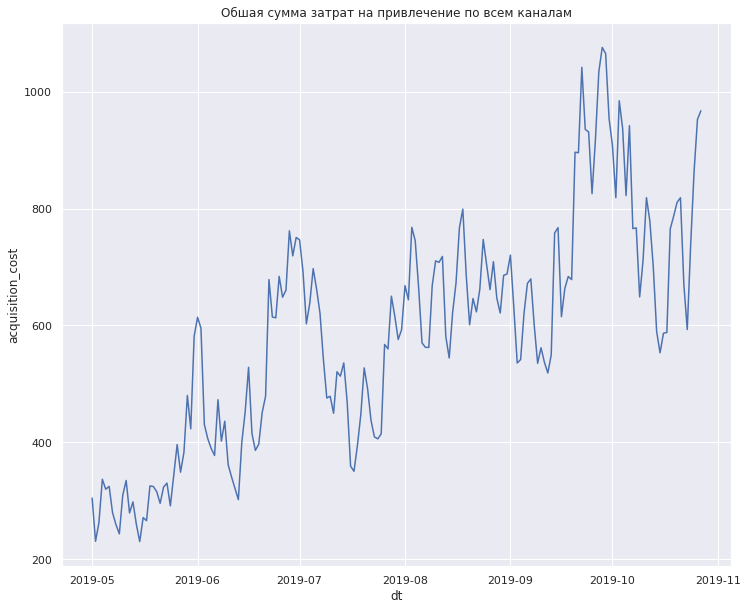

In [27]:
sns.set(rc={'figure.figsize':(12,10)})
ax = (sns.lineplot(data=profiles
                   .pivot_table(index='dt', values='acquisition_cost', aggfunc='sum')
                   .reset_index(), x='dt', y='acquisition_cost')
     )
ax.set_title(r'Обшая сумма затрат на привлечение по всем каналам');

Видим, что траты на рекламу, начиная с августа, практически никогда не падают меньше 600. Пик трат в октябре. Посмотрим на траты отдельно по каналам.

In [28]:
costs_dynamics = profiles.pivot_table(
    index='channel', columns='dt', values='acquisition_cost', aggfunc='sum'
)

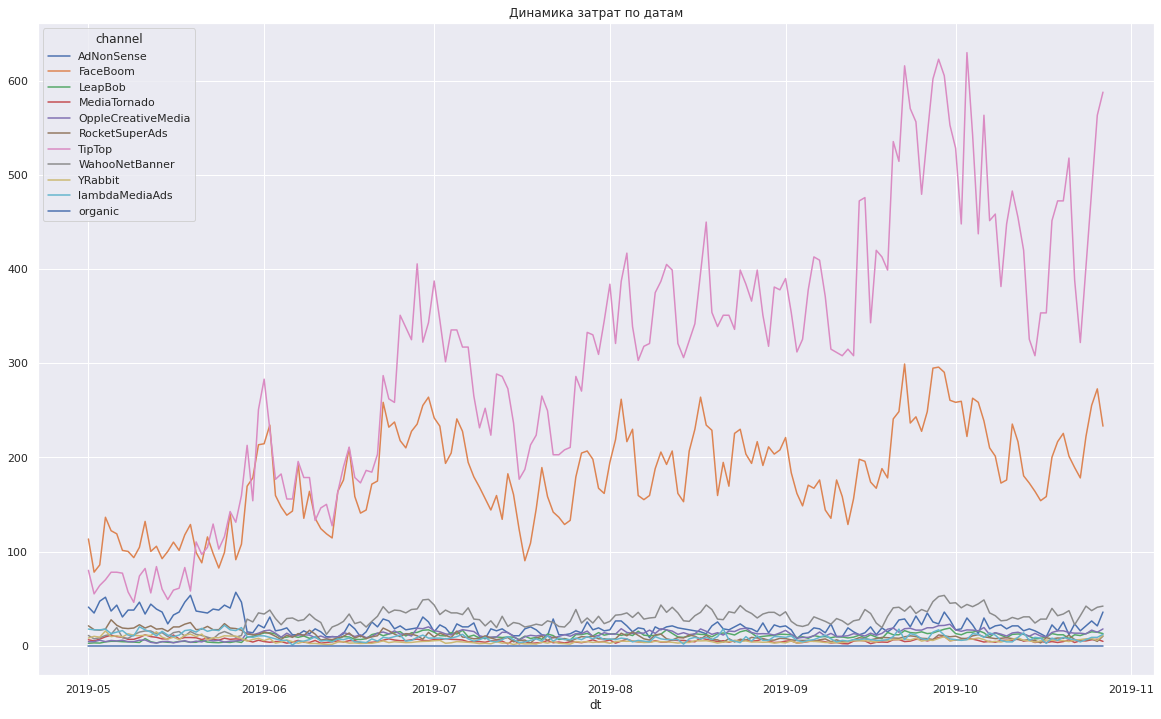

In [29]:
plt.rcParams["figure.figsize"] = (20,12)
costs_dynamics.T.plot(grid=True)
plt.title('Динамика затрат по датам');

Так не видно в какие конкретно дни были пик трат. Сделаем по дням.

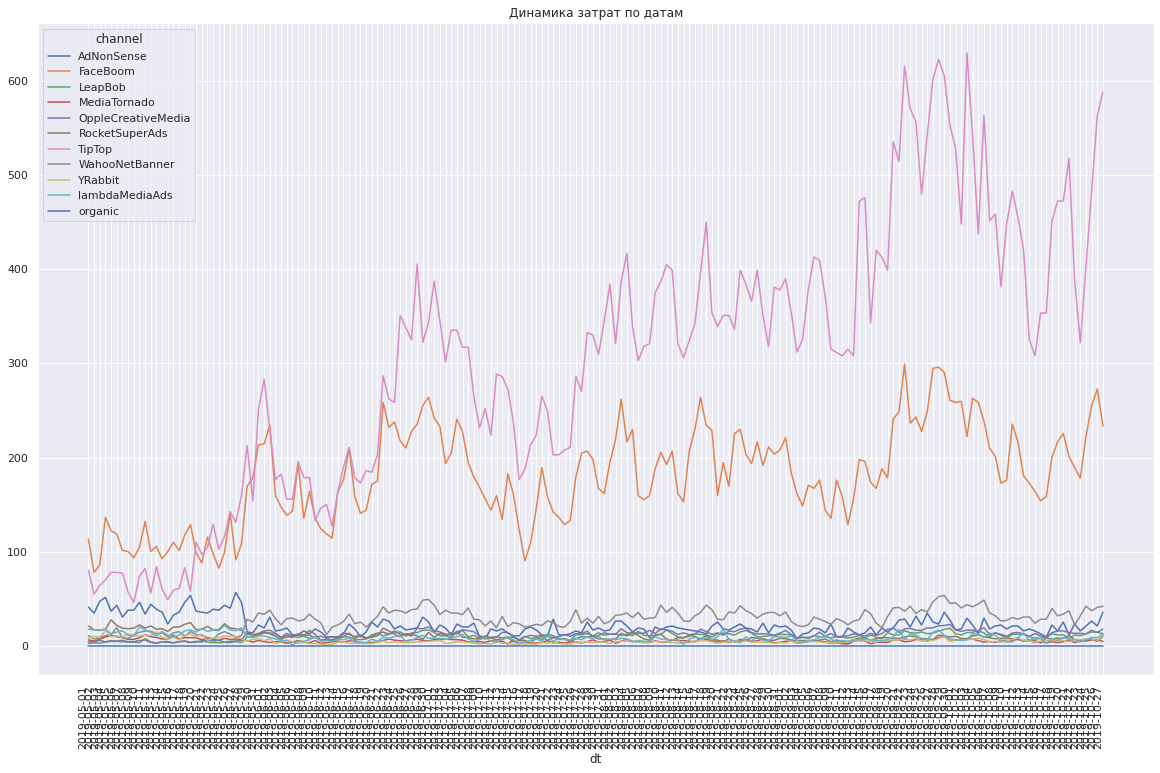

In [30]:
plt.rcParams["figure.figsize"] = (20,12)
costs_dynamics.T.plot(grid=True, xticks=list(costs_dynamics.columns.values))
plt.xticks(rotation=90, ha='right')
plt.title('Динамика затрат по датам');

Слишком много дат, ничего не разобрать. Я построю отдельно по месяцам график, а этот разделю на два периода. Возьму период с наибольшими тратами - начало августа, тогда общие траты практически стабильно не падали меньше 600.

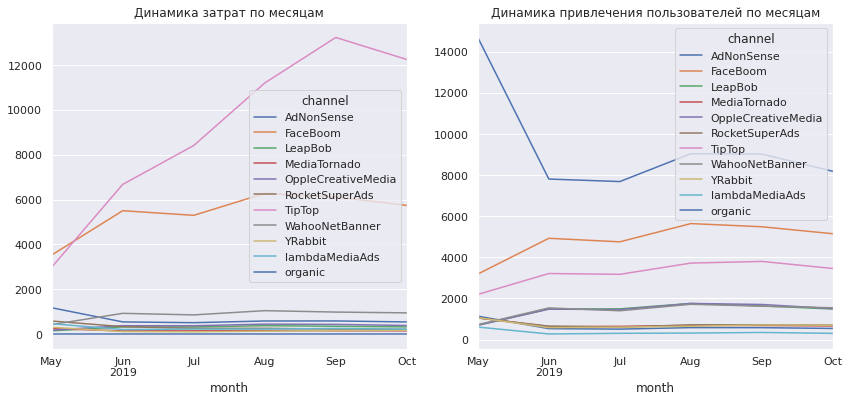

In [31]:
costs_dynamics_m = profiles.pivot_table(
    index='channel', columns='month', values='acquisition_cost', aggfunc='sum'
)
user_dynamics_m = profiles.pivot_table(
    index='channel', columns='month', values='user_id', aggfunc='count'
)
plt.rcParams["figure.figsize"] = (14,6)
ax1 = plt.subplot(1, 2, 1)
costs_dynamics_m.T.plot(grid=True, ax=ax1)
plt.title('Динамика затрат по месяцам')
ax2 = plt.subplot(1, 2, 2)
user_dynamics_m.T.plot(grid=True, ax=ax2)
plt.title('Динамика привлечения пользователей по месяцам');


Наибольшие траты по каналам TipTop и FaceBoom. Именно они перевешивали все остальные каналы в графике общих трат, и только по ним траты на привлечение увеличиваются с течением времени. Причем конвертация по TipTop не самая большая(9,6%). 

Теперь привлекательно смотрятся каналы AdNonSense - 11,3% и lambdaMediaAds - 10,5%. Траты по ним стабильны и постоянны, не превышают 500 в месяц. У lambdaMediaAds около 260 в месяц.

При сравнении графиков динамики затрат на рекламу по каналам и количеству привлеченных пользователей, видно, что количество пользователей по каналу TipTop увеличивается с увеличением трат, но не пропорционально. Невыгодный размен. Даже FaceBoom на фоне TipTop смотрится лучше. 

**Траты по каналам OppleCreativeMedia, LeapBob, WahooNetBanner стабильно низкие, а количество пользователей со временем растет. Отметим эти каналы в положительном ключе.**

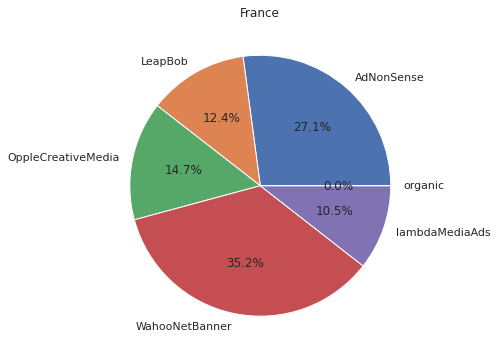

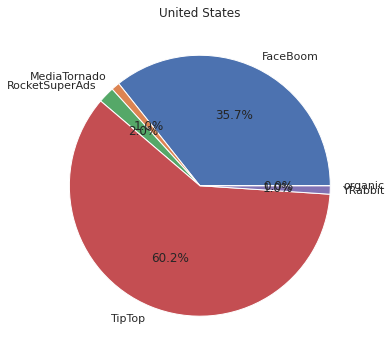

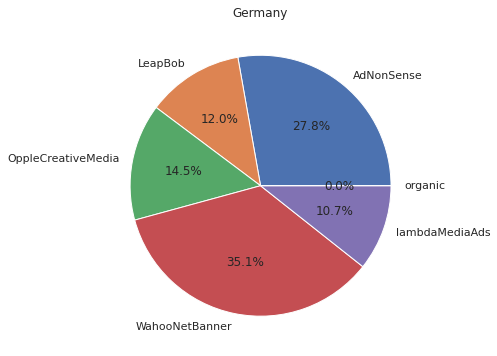

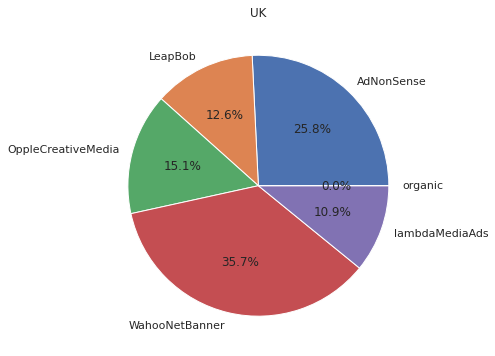

In [32]:

reg_dict = {'United States', 'France','Germany','UK'}

for i in reg_dict:
    reg_costs = profiles.query('region == @i').pivot_table(index='channel', columns='region',
                                 values='acquisition_cost', aggfunc='sum').reset_index().fillna(0)
    plt.figure()
    plt.pie(reg_costs[i], labels=reg_costs['channel'], autopct='%.1f%%')
    plt.title(i)

В США 60.2% приходится на TipTop, 35.7% на FaceBoom. Эти каналы работают на привлечения поьзователей из США, в других регионах их доминации не наблюдается.

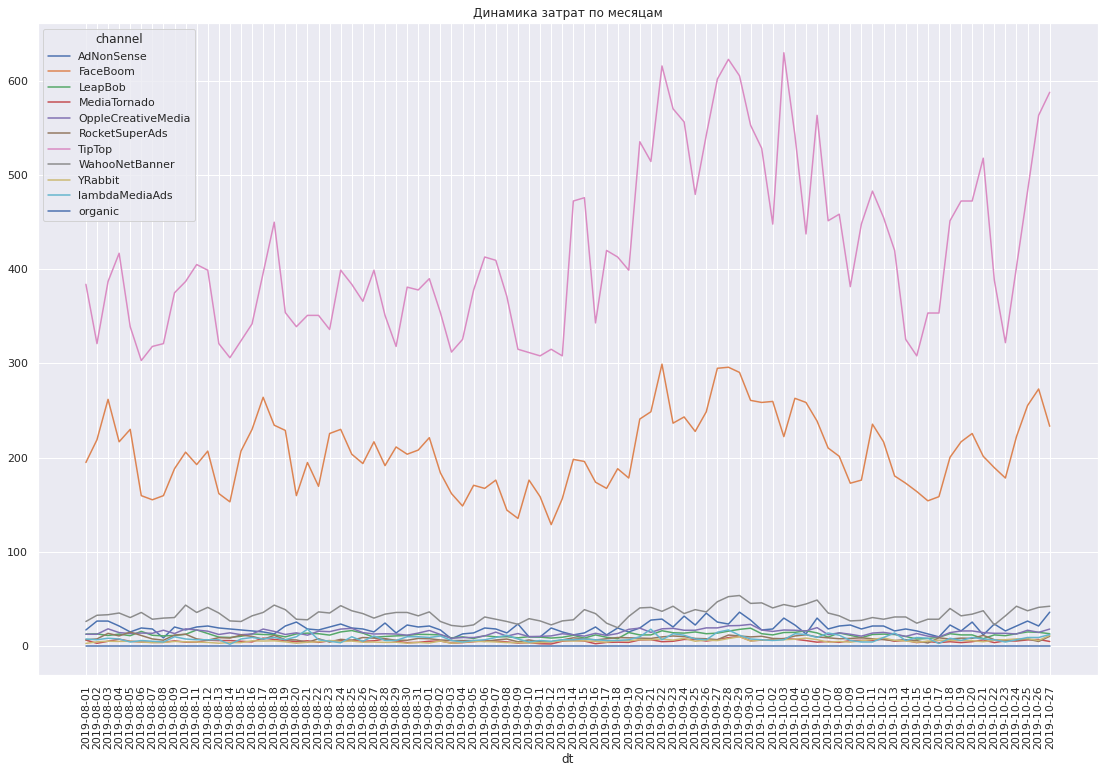

In [33]:
costs_dynamics_aug = profiles[profiles['first_ts'] >= '2019-08-01'].pivot_table(
    index='channel', columns='dt', values='acquisition_cost', aggfunc='sum'
)
plt.rcParams["figure.figsize"] = (19,12)
costs_dynamics_aug.T.plot(grid=True, xticks=list(costs_dynamics_aug.columns.values))
plt.xticks(rotation=90)
plt.title('Динамика затрат по месяцам');

Теперь видны конкретные дни с наибольшими тратами, например, 3 октября, 28 сентября, 22 сентября. Общие траты по дням можно не смотреть, он будет сопадать с графиком по каналу TipTop.

### Стоимость привлечения одного покупателя в среднем

In [34]:
costs_mean = (profiles.groupby('channel')
 .agg({'user_id' : 'count', 'payer' : 'sum', 'acquisition_cost' : 'sum'})
 .reset_index().sort_values(by='acquisition_cost', ascending=False, ignore_index=True)
)

In [35]:
costs_mean['mean_user'] = costs_mean['acquisition_cost'].div(costs_mean['user_id'], axis=0).round(2)
costs_mean['mean_payer'] = costs_mean['acquisition_cost'].div(costs_mean['payer'], axis=0).round(2)

In [36]:
sum_costs = round(costs_mean['acquisition_cost'].sum(), 2)
sum_users = costs_mean.query('channel != "organic"')['user_id'].sum()
sum_payers = costs_mean.query('channel != "organic"')['payer'].sum()
total_cac_mean = round(sum_costs / sum_users, 2)
payer_cac_mean = round(sum_costs / sum_payers, 2)
print(f'Средний CAC на одного пользователя для всего проекта: {total_cac_mean}')
print(f'Средний CAC на одного покупателя для всего проекта: {payer_cac_mean}')
costs_mean.sort_values(by='mean_payer', ascending=False)

Средний CAC на одного пользователя для всего проекта: 1.13
Средний CAC на одного покупателя для всего проекта: 13.66


,channel,user_id,payer,acquisition_cost,mean_user,mean_payer
0,TipTop,19561,1878,54751.30,2.80,29.15
2,WahooNetBanner,8553,453,5151.00,0.60,11.37
4,OppleCreativeMedia,8605,233,2151.25,0.25,9.23
1,FaceBoom,29144,3557,32445.60,1.11,9.12
3,AdNonSense,3880,440,3911.25,1.01,8.89
7,lambdaMediaAds,2149,225,1557.60,0.72,6.92
6,LeapBob,8553,262,1797.60,0.21,6.86
8,MediaTornado,4364,156,954.48,0.22,6.12
9,YRabbit,4312,165,944.22,0.22,5.72
5,RocketSuperAds,4448,352,1833.00,0.41,5.21


Общее среднее CAC на одного пользователя 1.13 доллара, на покупателя 13.66. Я исключил из расчетов канал organic, так как он бесплатный и занижал среднее.

По каналам  затрат на одного пользователя все так же лидируют TipTop и FaceBoom - 2.8/29.15 и 1.11/9.12, соответсвенно - это самые невыгодные каналы. 

Имеет смысл увеличить бюджет для канала RocketSuperAds, он выглядит наиболее перспективно. Средняя цена привлечения одного покупателя низкая. 

В целом стоит распределить бюджет по каналам более равномерно. Неизвестно, почему отдается предпочтение TipTop и FaceBoom, очень дорого при такой конвертации в пользователей в покупатели.

# 5. Окупаемость рекламы для привлечения пользователей

## Окупаемость рекламы

### Общая окупаемость рекламы

In [37]:
profiles = profiles.query('channel != "organic"')

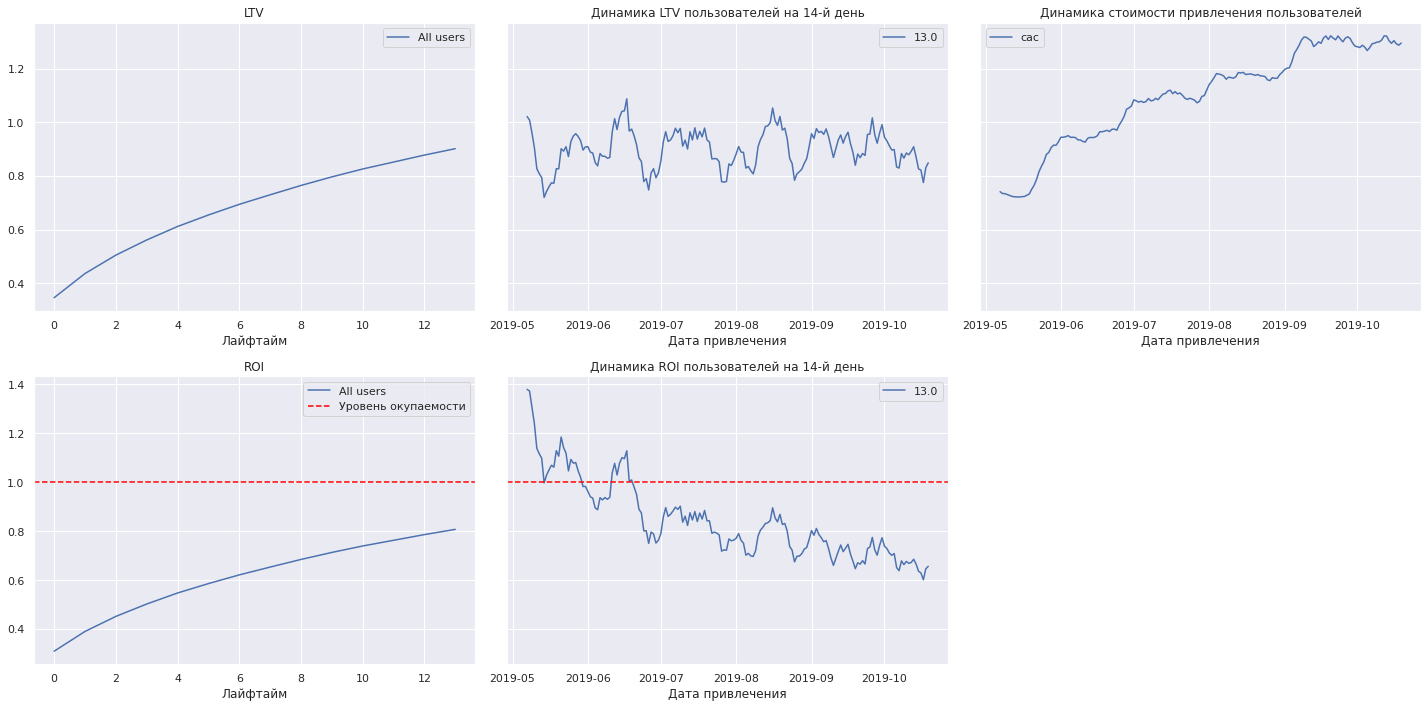

In [38]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Выводы:

* LTV к 14 дню достигает 0.9.
* Динамика LTV стабильна. 
* Реклама не окупается, ROI  к концу второй недели 80%.
* СAC нестабилен растет с 0.8 до 1.4. Возможно, неокупаемость рекламы связана с увеличением рекламного бюджета.
* ROI падает пропорционально увеличинию CAC.

### Окупаемость рекламы с разбивкой по устройствам

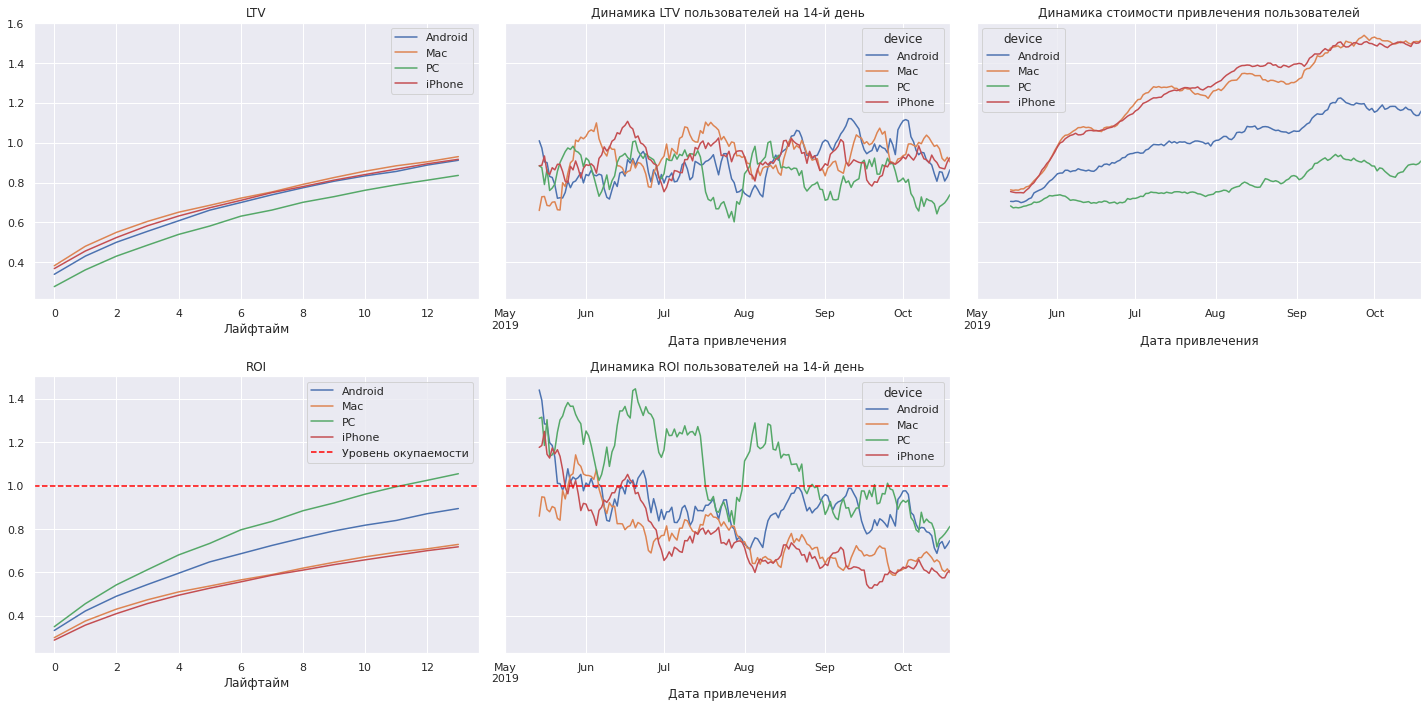

In [39]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Выводы:

* Окупаются только пользователи ПК.
* Стоимость привлечения пользователей с Mac, Iphone и Android увеличивается со временем. Чем меньше, стоимость привлечения, тем больше ROI, поэтому пользователи ПК самые выгодные.
* Со временем ROI на пользователей на всех устройствах падает, просто для пользователей ПК менее резко.
* LTV пользователей ПК самое низкое, несмотря на то, что они окупаются лучше остальных. Хоть пользователи Mac, Iphone и Android тратят больше, но этого недостаточно, чтобы окупить расходы на рекламу.

###  Окупаемость рекламы с разбивкой по странам

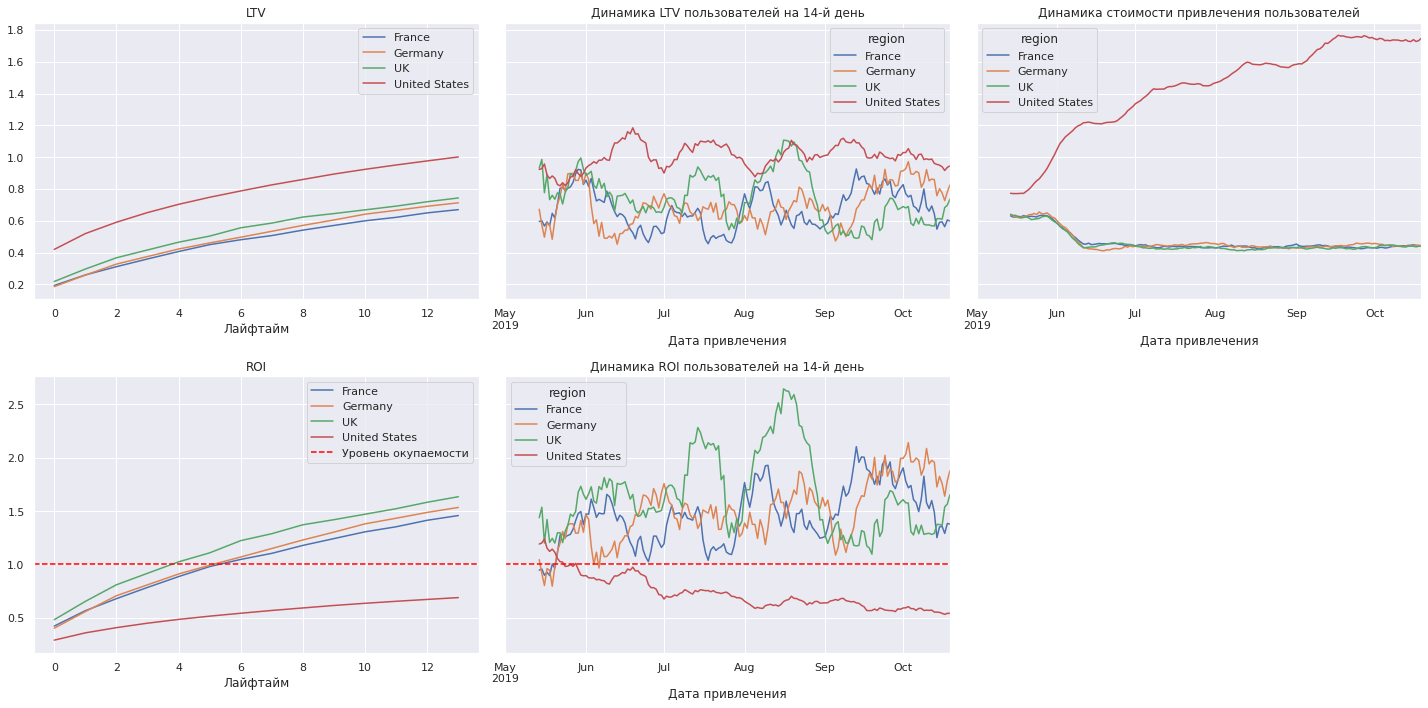

In [40]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Выводы:

* Наибольший LTV в США.
* Реклама не окупается только в США.
* Стоимость привлечения для США в разы превышает для других стран.

### Окупаемость рекламы с разбивкой по рекламным каналам

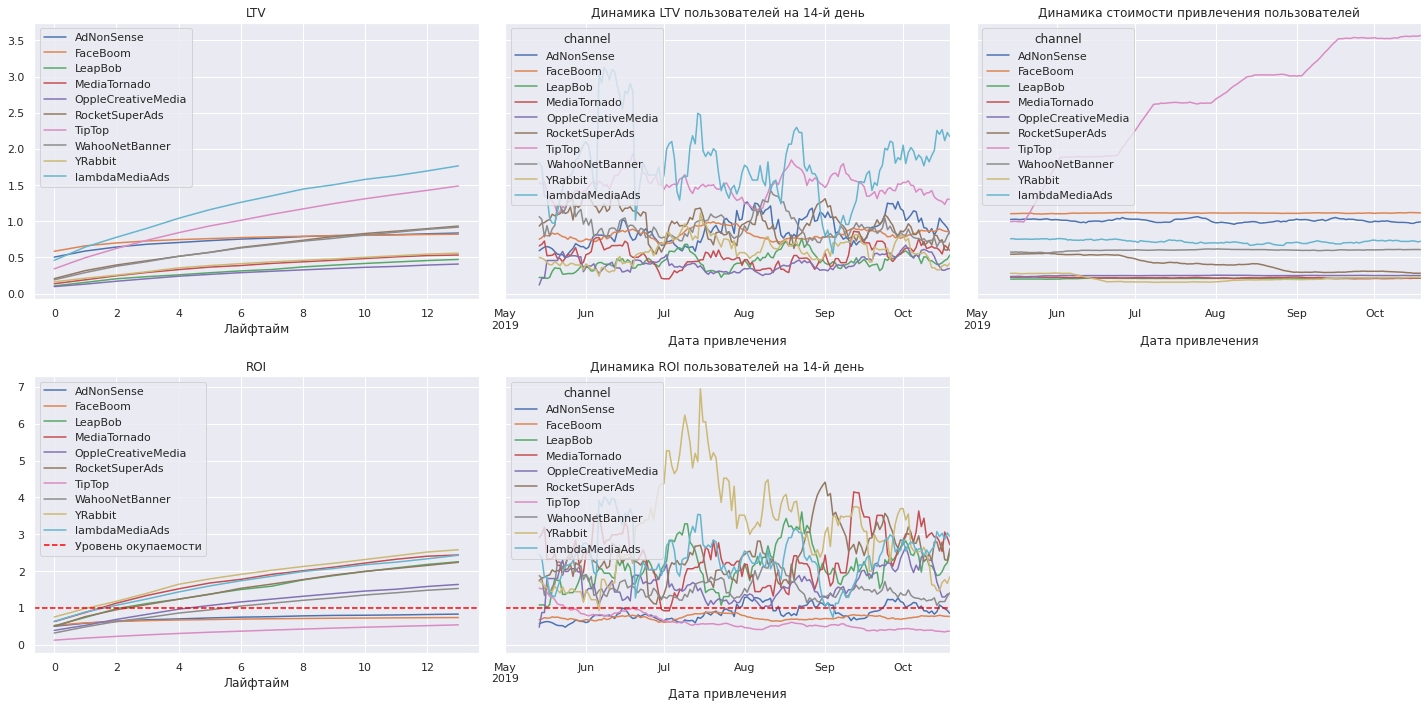

In [41]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Выводы:

* Три канала рекламы не окупаются: TipTop, AdNonSense, FaceBoom.  Наилучшая окупаемость у YRabbit. В динамике пик ROI пришелся на июль месяц, дальше YRabbit упал до общих значений.
* Наилучший LTV у lambdaMediaAds и TipTop.
* В динамике LTV очень не стабилен у lambdaMediaAds. Возможно, из-за того, что мало пользователей, данных.
* В динамике CAC у TipTop растет практически скачками, в каждом месяце все больше и больше.
* Хорошо окупаются каналы: YRabbit, lambdaMediaAds, MediaTornado, RocketSuperAd

### Конверсия по устройствам

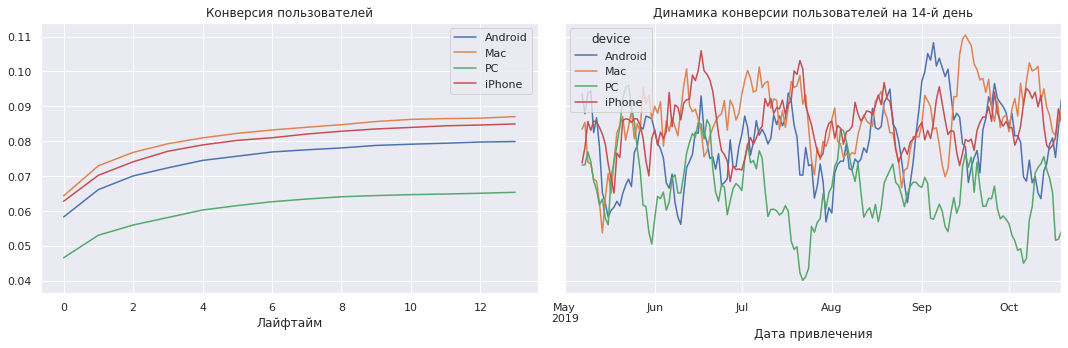

In [42]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конвертируются пользователи Mac и Iphone хорошо

### Конверсия по странам

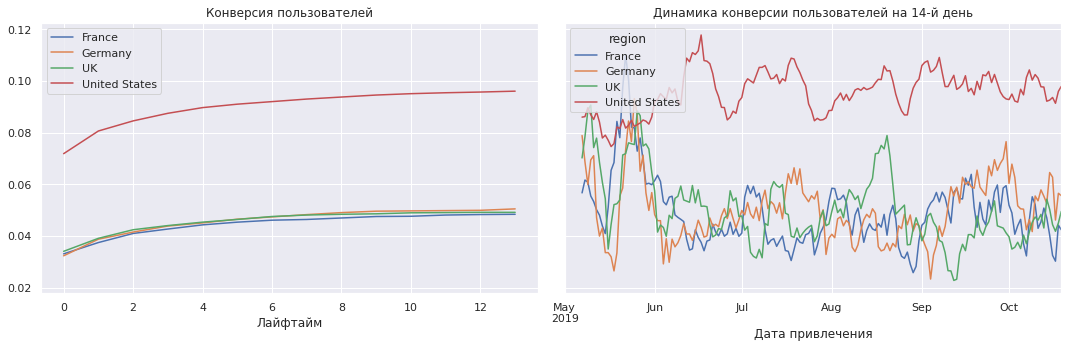

In [43]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

С большим отрыв лидирует США. Логично.

### Конверсия по каналам

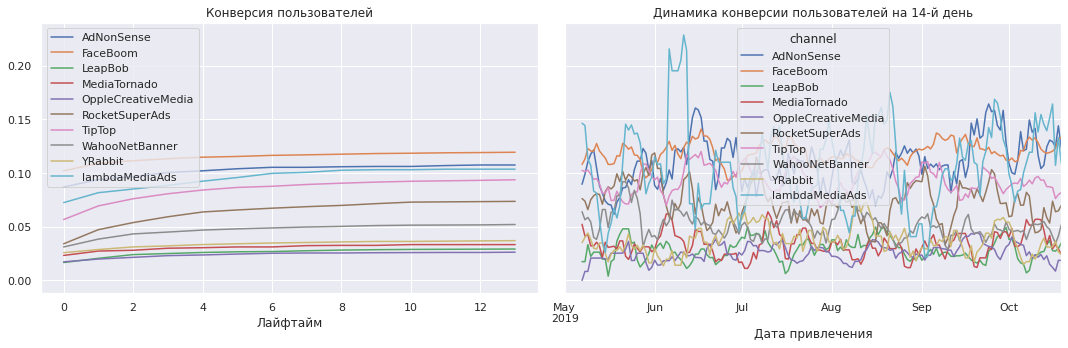

In [44]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Ничего нового, лидируют FaceBoom, AdNonSense, lambdaMediaAds, TipTop. Но только один канал из лидеров здоров - lambdaMediaAds

### Удержание по устройствам

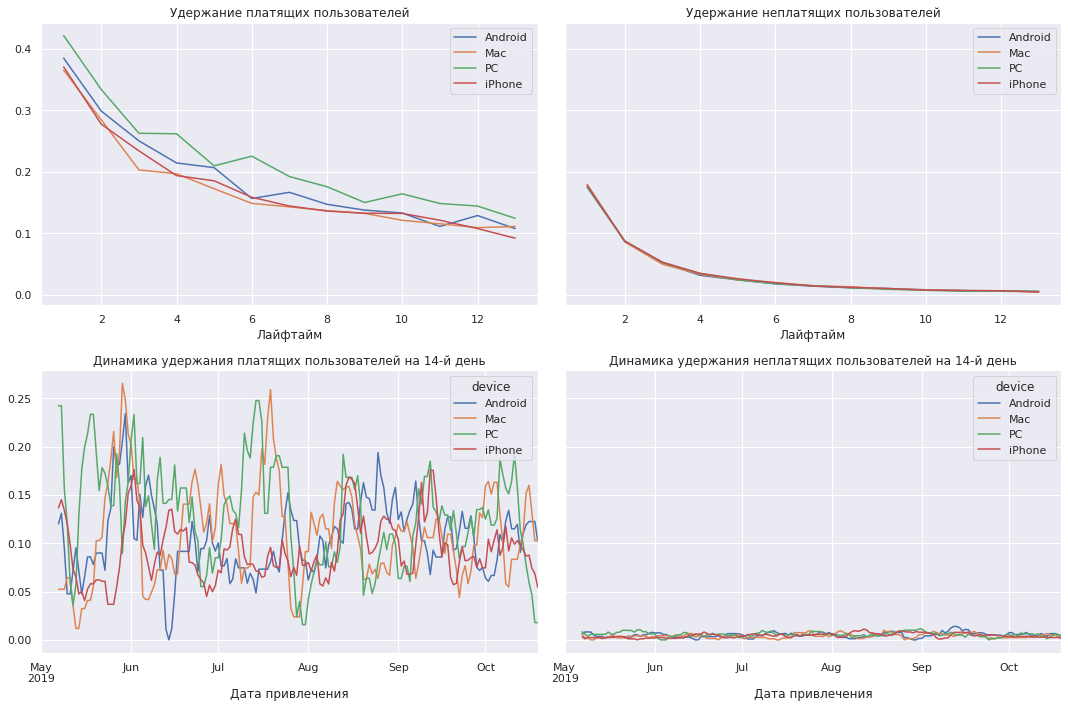

In [45]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Все пользователи примерно одинаково удерживаются. Хуже всех все же айфон, лучше всех ПК.

### Удержание по странам

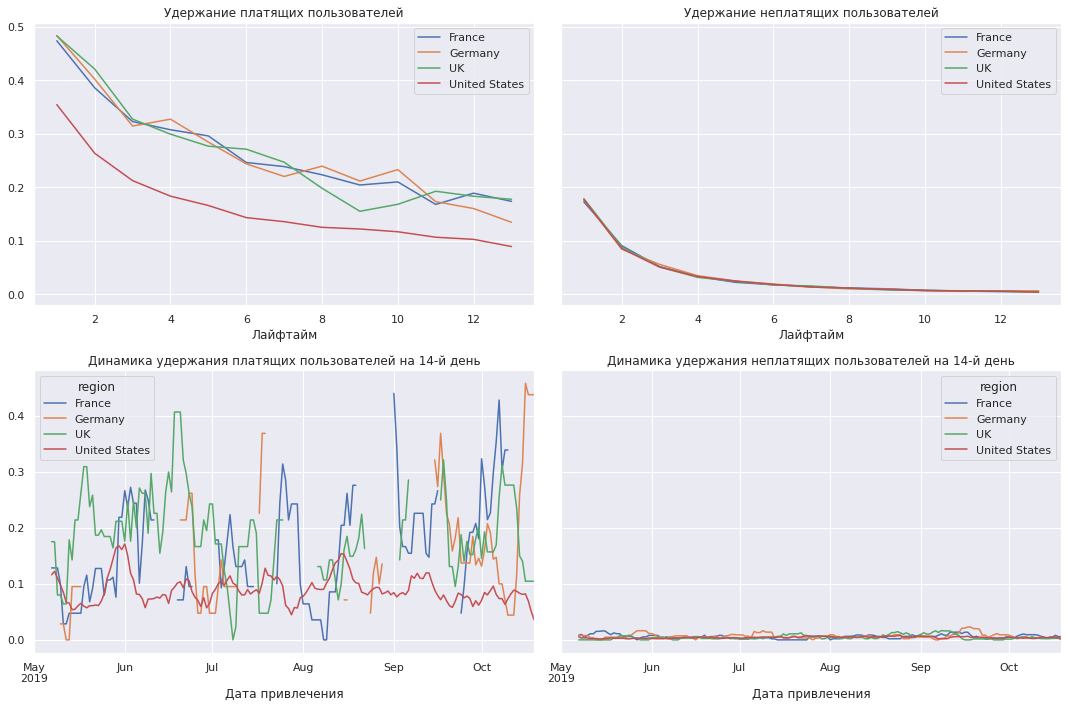

In [46]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Наихудшее удержание в США, одновременно с наилучшей конверсией. 

### Удержание по каналам

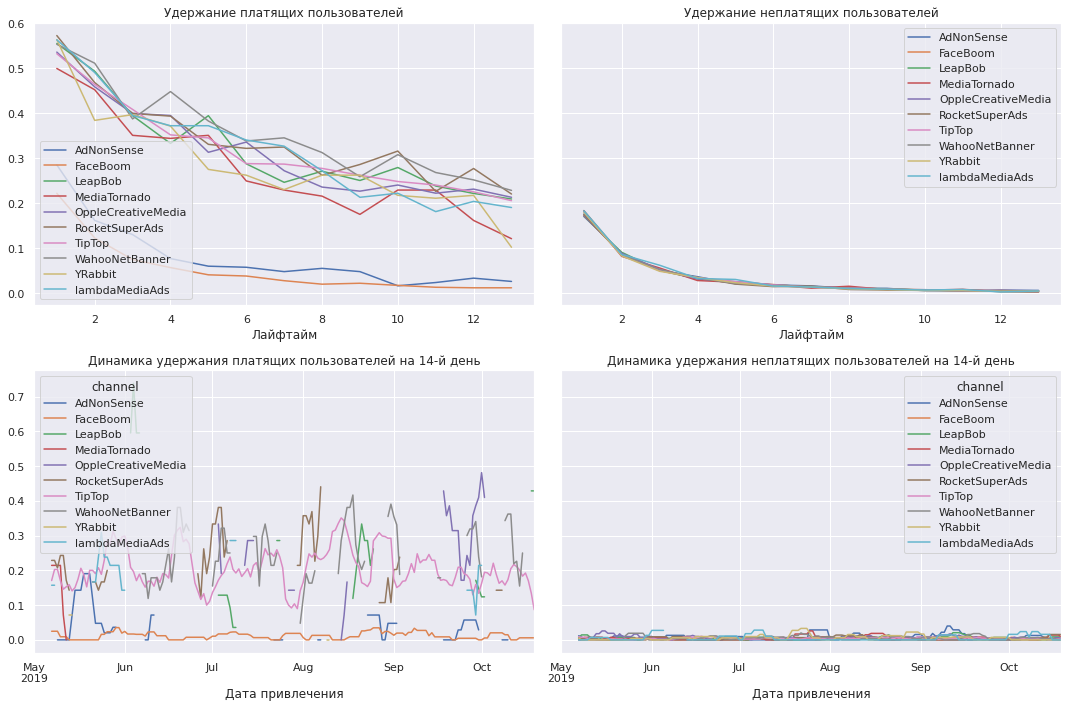

In [47]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Худшее удержание у каналов AdNonSense и FaceBoom, практически  на 14 день. Также на 14 день не очень хорошие результаты у YRabbit и MediaTornado, возможно, волатильность связана с маленькой выборкой.

Лучшие каналы по удержанию и конверсии: lambdaMediaAds и RocketSuperAd 

###  LTV, ROI, удержание, конверсия для Америки с разбивкой по каналам графики.

In [48]:
usa = profiles.query('region == "United States"')

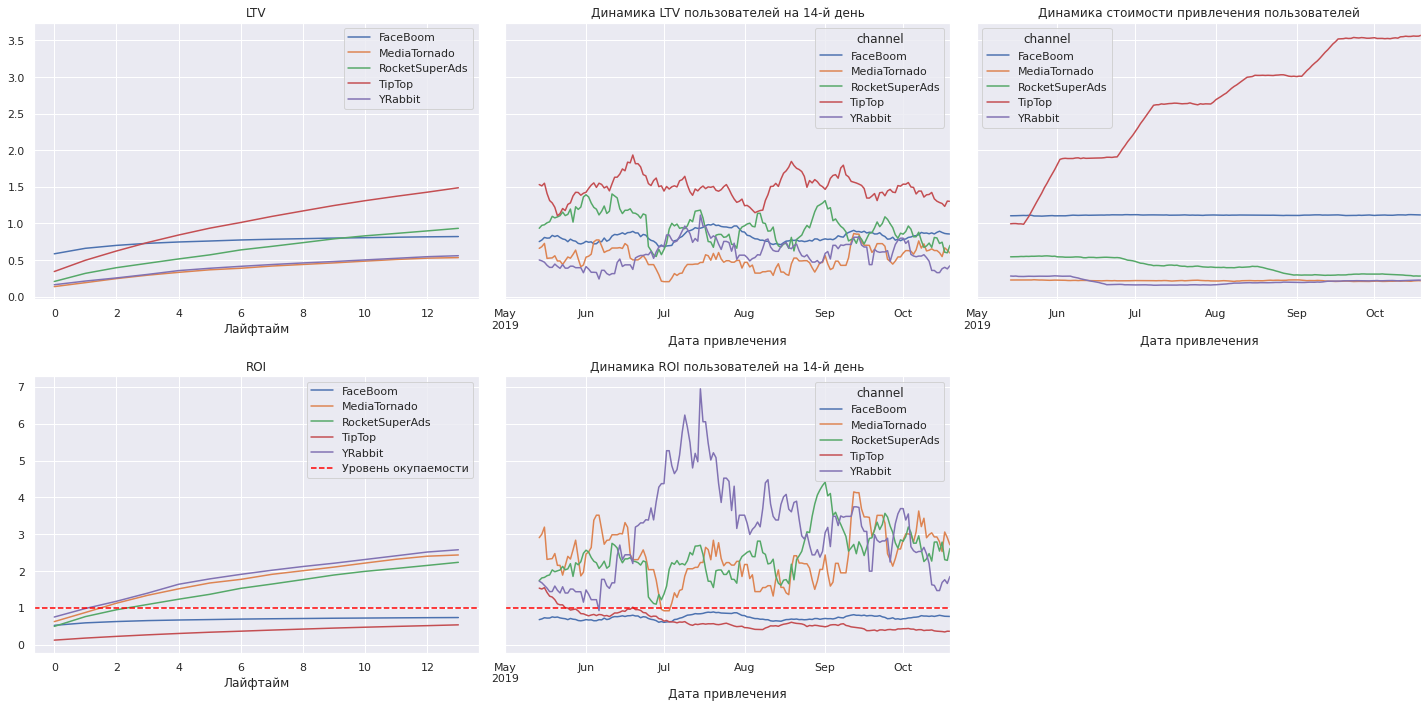

In [49]:
# считаем LTV и ROI для Америки
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    usa, orders, observation_date, horizon_days, dimensions=['channel']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

В Америке окупаются три канала: YRabbit, RocketSuperAds, MediaTornado. Наиболее перспективным выглядит RocketSuperAds. Стоимость привлечения падала, а по LTV он на втором месте, к 14 дню 1 доллар.

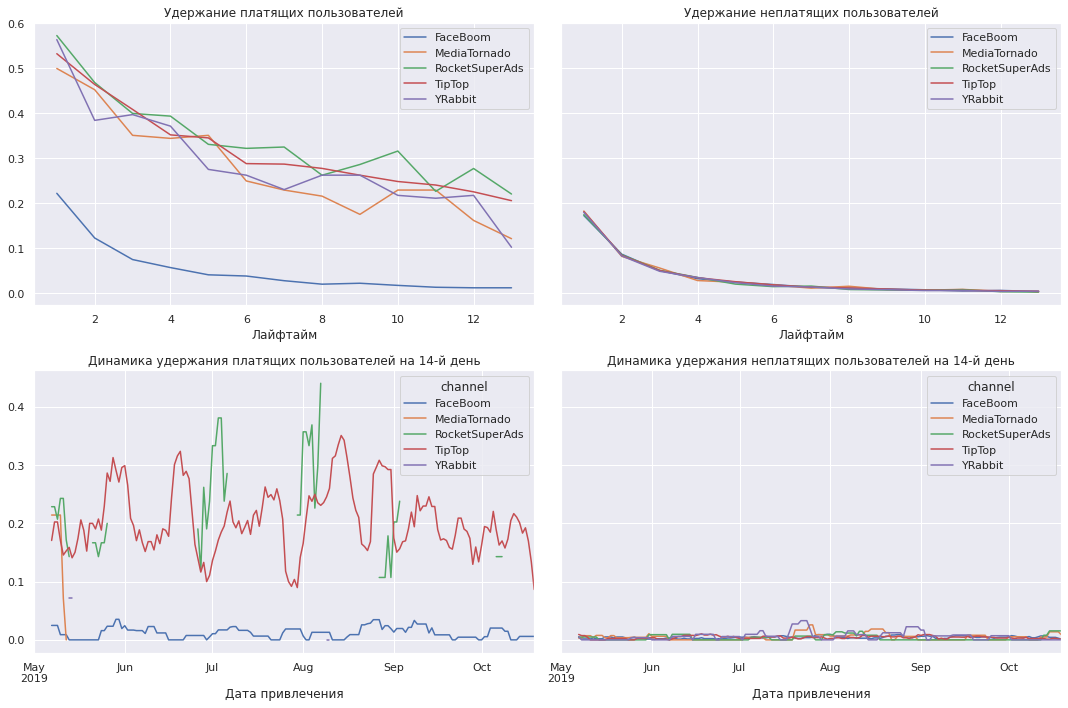

In [50]:
retention_raw, retention_grouped, retention_history = get_retention(
    usa, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

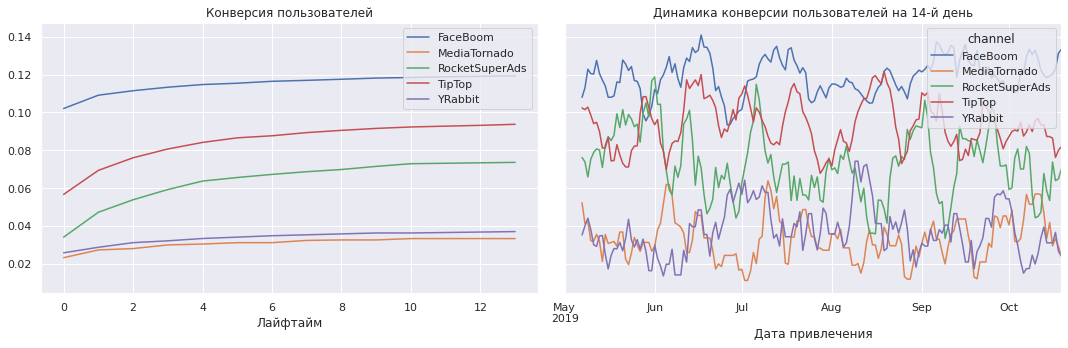

In [51]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    usa, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

По удержанию и конверсии RocketSuperAds выглядит тоже очень хорошо, хоть и динамика удержания очень нестабильна, график прерывистый.

### Вывод

В целом реклама не окупается. 
Оказывают негативное влияние на окупаемость рекламы:
* Страны: США
* Устройства: Mac и Iphone
* Каналы привлечения: TipTop, AdNonSense, FaceBoom.

Проблемы окупаемости могут быть вызваны ошибками менеджмента в распределении бюджета на рекламу. Покупатели по каналам TipTop и FaceBoom дорогие, однако бюджет на них с каждым месяцем увеличивался. Также плохо удерживаются пользователи из США, видимо, прокрастинировать им образ жизни позволяет недолго.

# 6. Выводы

## Выводы

**Причины неэффективности привлечения пользователей:**

* Неправильный выбор каналов привлечения, вкладывание в них больших сумм рекламного бюджета.
* Сделан акцент на конвертацию пользователей США, но они плохо удерживаются.
* Большие траты по каналам TipTop и FaceBoom и небольшое количество привлеченных пользователей по этим каналам.
* Пользователи из США тратят больше всех, казалось бы, они наиболее "качественные", но из-за больших трат на рекламу и плохого удержания все "качество" нивелируется.
* Пользователи Mac, Iphone, Android не окупаются.

**Рекомендации:**

* Необходимо пересмотреть стратегию инвестиций в рекламу. Снизить траты по каналам TipTop, AdNonSense, FaceBoom. 
* **В Америке окупаются YRabbit, RocketSuperAds, MediaTornado. Между ними стоит перераспределить бюджет. Самый перспективный канал RocketSuperAds.**
* Канал lambdaMediaAds в совокупности показателей смотрится очень перспективно. Стоит вложиться в него.
* OppleCreativeMedia, LeapBob, WahooNetBanner при низких тратах привлекают большое количество пользователей. На эти каналы тоже стоит обратить внимание.
